In [142]:
# import the necessary libraries and packages

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

In [79]:
# imported the dataset as a csv and named it diabetes

data = pd.read_csv('/Users/luciaranallo/Downloads/dataset_diabetes/diabetic_data.csv')
data.head()

# I then selected only for the numeric variables (excluded categorical)

diabetes2 = data.select_dtypes(include=np.number)
diabetes2.head()

# I then created a dataset that only included my two variables of interest

diabetes = diabetes2[["time_in_hospital","num_lab_procedures"]]

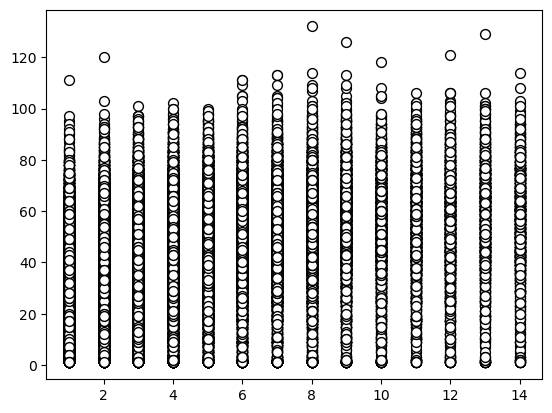

In [83]:
# I created a scatter plot of the two variables I chose to use in the algorithm

plt.scatter(
    diabetes.time_in_hospital,diabetes.num_lab_procedures,
    c="white",marker="o",
    edgecolor="black",s=50)
plt.show()

## Elbow Plot

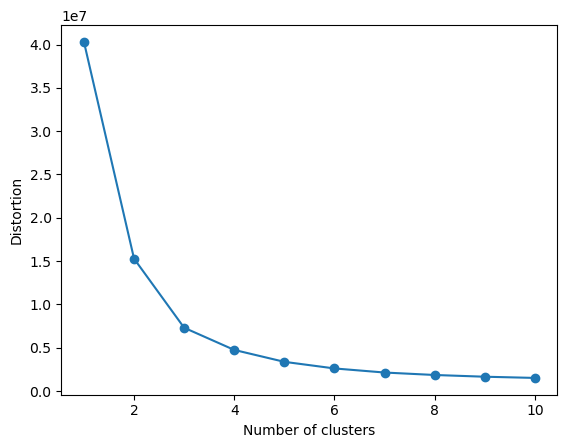

In [84]:
# calculate distortion for a range of number of cluster

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(diabetes)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Run KMeans

Based on the Elbow plot I chose to run KMeans on 3 different cluster sizes (2,3,4) and compare the SSE values. We can see that 2 clusters would likely be too few while using any more than 4 clusters could result in overfitting the model. The difference in SSE between 2 and 3 clusters is much larger than that between 3 and 4, which means that using 3 clusters would not have been negative either. I ended up choosing 4 because it minimized the error without too much overfitting of the data. 

In [131]:
# KMeans algorithm and centroid coordinates for cluster size 2

km1 = KMeans(
    n_clusters=2, init='random',
    n_init = 10, max_iter=300,
    tol = 1e-04, random_state=0)
y_km1 = km1.fit_predict(diabetes)
y_km1
km1.cluster_centers_

array([[ 5.02926649, 56.28908639],
       [ 3.50369283, 24.50601269]])

In [132]:
# SSE for cluster size 2

km1.inertia_

15281303.60498813

In [133]:
# KMeans algorithm and centroid coordinates for cluster size 3

km2 = KMeans(
    n_clusters=3, init='random',
    n_init = 10, max_iter=300,
    tol = 1e-04, random_state=0)
y_km2 = km2.fit_predict(diabetes)
y_km2
km2.cluster_centers_

array([[ 5.57171011, 64.12060677],
       [ 4.02321302, 41.02791836],
       [ 3.34273425, 13.51302605]])

In [134]:
# SSE for cluster size 3

km2.inertia_

7309893.89598102

In [135]:
# KMeans algorithm and centroid coordinates for cluster size 4

km3 = KMeans(
    n_clusters=4, init='random',
    n_init = 10, max_iter=300,
    tol = 1e-04, random_state=0)
y_km3 = km3.fit_predict(diabetes)
y_km3
km3.cluster_centers_

array([[ 3.21532755, 10.20357098],
       [ 3.71502608, 34.2766753 ],
       [ 4.5728195 , 50.29646688],
       [ 5.98476435, 68.96435521]])

In [136]:
# SSE for cluster size 4

km3.inertia_

4749943.50637202

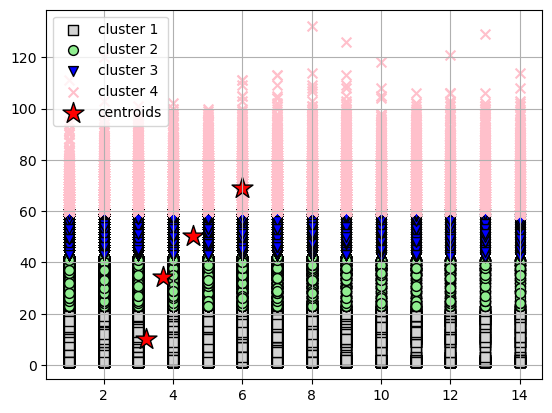

In [141]:
# I had to convert the dataset to an array to use with the KMeans output

diabetesX = np.array(diabetes)

# I then plotted the 4 clusters and their centroids
plt.scatter(
    diabetesX[y_km3 == 0, 0], diabetesX[y_km3 == 0, 1],
    s=50, c='lightgray',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    diabetesX[y_km3 == 1, 0], diabetesX[y_km3 == 1, 1],
    s=50, c='lightgreen',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    diabetesX[y_km3 == 2, 0], diabetesX[y_km3 == 2, 1],
    s=50, c='blue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    diabetesX[y_km3 == 3, 0], diabetesX[y_km3 == 3, 1],
    s=50, c='pink',
    marker='x',
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    km3.cluster_centers_[:, 0], km3.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()


We can see in this graph the 4 different clusters differentiated by colors, as well as the 4 centroids indicated by the red stars. It would be interesting to use this data on a graph where the clusters were more visible with continuous data rather than the nominal data that we used. We can also see that the third cluster is quite small with a centroid close to the second, indicating that we potentially could've used 3 clusters instead of 4. 